In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import scipy as sp
from scipy.stats import ttest_ind, chi2_contingency, f_oneway, pearsonr, kruskal, spearmanr

In [8]:
df = pd.read_csv('global_climate_events_economic_impact_2020_2025.csv')

display(df)

,event_id,date,year,month,country,event_type,severity,duration_days,affected_population,deaths,injuries,economic_impact_million_usd,infrastructure_damage_score,response_time_hours,international_aid_million_usd,latitude,longitude,total_casualties,impact_per_capita,aid_percentage
0,EV01539,2020-01-01,2020,1,Japan,Tsunami,1,1,420956,0,2,0.01,4.9,11,0.0,85.4321,138.7206,2,0.02,0.0
1,EV02303,2020-01-01,2020,1,Qatar,Hurricane,1,4,3276,1,10,0.00,3.4,5,0.0,-32.0370,14.0111,11,0.00,0.0
2,EV01796,2020-01-02,2020,1,Canada,Drought,3,6,120382,0,9,0.10,8.9,10,0.0,78.4213,-112.7556,9,0.83,0.0
3,EV00175,2020-01-02,2020,1,Poland,Heatwave,6,16,185527,2,37,1.27,17.8,7,0.0,73.6564,115.0650,39,6.85,0.0
4,EV01115,2020-01-03,2020,1,UAE,Wildfire,4,16,176642,2,27,2.01,18.7,17,0.0,52.6458,101.5023,29,11.38,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,EV00053,2025-09-10,2025,9,Germany,Earthquake,3,1,587081,1,8,0.67,11.0,10,0.0,-85.3844,-57.1508,9,1.14,0.0
2996,EV00349,2025-09-12,2025,9,Peru,Hurricane,4,1,479652,2,23,0.03,6.8,0,0.0,-18.2696,-173.0978,25,0.06,0.0
2997,EV01781,2025-09-13,2025,9,Nigeria,Cold Wave,2,22,2127579,2,10,0.73,16.2,16,0.0,78.4899,120.1220,12,0.34,0.0
2998,EV00680,2025-09-14,2025,9,Indonesia,Drought,3,55,1817931,2,21,2.89,6.4,14,0.0,70.2013,12.7431,23,1.59,0.0


In [9]:
print(df.isna().sum())

event_id                         0
date                             0
year                             0
month                            0
country                          0
event_type                       0
severity                         0
duration_days                    0
affected_population              0
deaths                           0
injuries                         0
economic_impact_million_usd      0
infrastructure_damage_score      0
response_time_hours              0
international_aid_million_usd    0
latitude                         0
longitude                        0
total_casualties                 0
impact_per_capita                0
aid_percentage                   0
dtype: int64


In [10]:
print(df.dtypes)
display(df.describe())

event_id                          object
date                              object
year                               int64
month                              int64
country                           object
event_type                        object
severity                           int64
duration_days                      int64
affected_population                int64
deaths                             int64
injuries                           int64
economic_impact_million_usd      float64
infrastructure_damage_score      float64
response_time_hours                int64
international_aid_million_usd    float64
latitude                         float64
longitude                        float64
total_casualties                   int64
impact_per_capita                float64
aid_percentage                   float64
dtype: object


,year,month,severity,duration_days,affected_population,deaths,injuries,economic_impact_million_usd,infrastructure_damage_score,response_time_hours,international_aid_million_usd,latitude,longitude,total_casualties,impact_per_capita,aid_percentage
count,3000.000000,3000.000000,3000.000000,3000.000000,3.000000e+03,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000
mean,2022.401667,6.260333,3.786333,8.783000,8.685505e+05,4.615000,39.228333,1.944367,15.160733,11.107667,0.057020,-0.053334,-0.133522,43.843333,3.613917,0.009267
std,1.653857,3.367146,2.005165,14.714508,3.009690e+06,11.021491,78.812194,15.734990,11.501826,8.255753,3.005868,51.985637,103.941947,85.943626,10.779860,0.427530
min,2020.000000,1.000000,1.000000,0.000000,6.220000e+02,0.000000,0.000000,0.000000,0.200000,0.000000,0.000000,-89.756300,-179.982700,0.000000,0.000000,0.000000
25%,2021.000000,3.000000,2.000000,1.000000,5.451775e+04,1.000000,10.000000,0.010000,6.000000,5.000000,0.000000,-44.905350,-89.849575,11.000000,0.080000,0.000000
50%,2022.000000,6.000000,4.000000,2.000000,1.784770e+05,2.000000,18.000000,0.090000,12.400000,9.000000,0.000000,-1.506450,-0.368500,20.000000,0.480000,0.000000
75%,2024.000000,9.000000,5.000000,9.000000,6.082012e+05,3.000000,27.000000,0.530000,21.425000,15.000000,0.000000,46.775275,93.652275,29.000000,2.132500,0.000000
max,2025.000000,12.000000,9.000000,115.000000,5.624832e+07,117.000000,734.000000,718.210000,63.000000,60.000000,164.510000,89.976900,179.964400,738.000000,181.620000,22.900000


Распределение по типу бедствия: 
 ---------------------------------------- 
 event_type
Earthquake           287
Landslide            275
Drought              262
Volcanic Eruption    261
Hurricane            252
Hailstorm            248
Tsunami              247
Cold Wave            238
Tornado              237
Wildfire             237
Heatwave             235
Flood                221
Name: count, dtype: int64


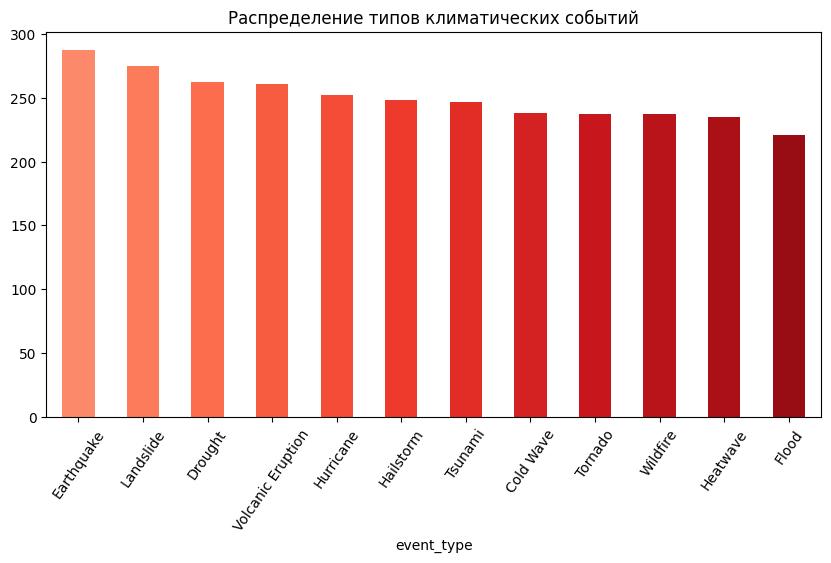

In [11]:
events_count = df['event_type'].value_counts()
print("Распределение по типу бедствия: \n", "-"*40, '\n', events_count)

plt.figure(figsize=(10,5))
colors = plt.cm.Reds(np.linspace(0.4, 0.9, len(events_count)))
# sns.histplot(data=df, x='event_type')
events_count.plot(kind='bar', color=colors)
plt.title('Распределение типов климатических событий')
plt.xticks(rotation=55)
plt.show()

Топ 10 стран по количеству событий: 
 ---------------------------------------- 
 country
Japan             86
Portugal          75
Czech Republic    70
Egypt             70
Denmark           69
Singapore         68
France            68
Hungary           67
Kazakhstan        67
New Zealand       66
Name: count, dtype: int64


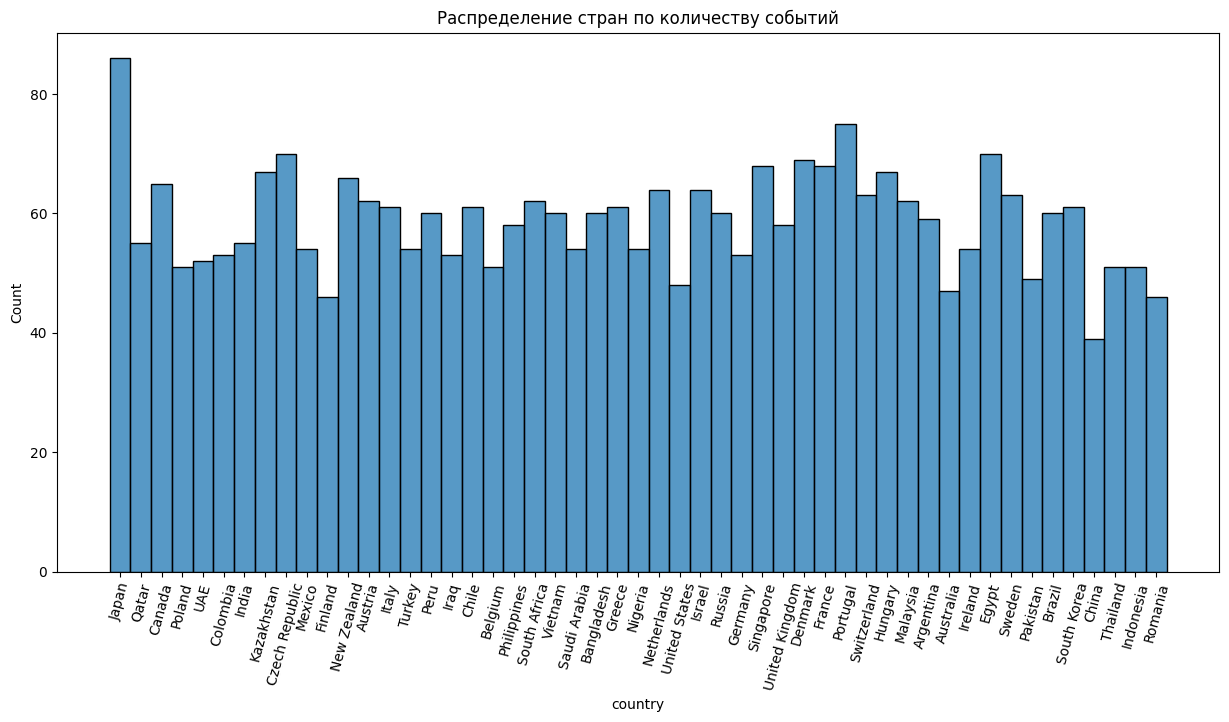

In [12]:
print("Топ 10 стран по количеству событий: \n", "-"*40, '\n', df['country'].value_counts().head(10))

plt.figure(figsize=(15, 7))
sns.histplot(data=df, x='country')
plt.title('Распределение стран по количеству событий')
plt.xticks(rotation=75)
plt.show()

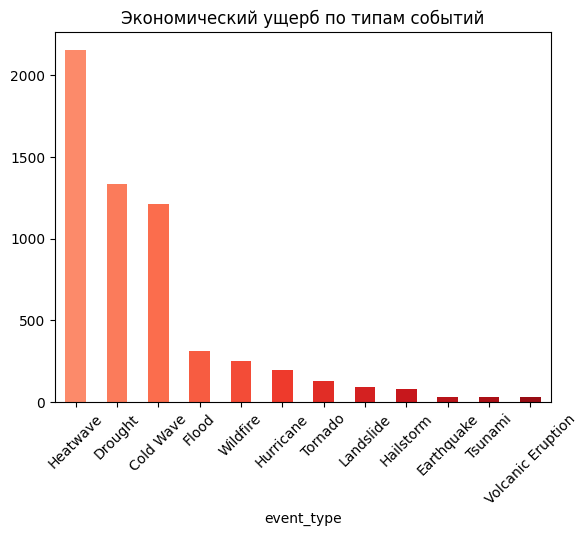

In [13]:
economic_by_type = df.groupby('event_type')['economic_impact_million_usd'].sum().sort_values(ascending=False)
colors = plt.cm.Reds(np.linspace(0.4, 0.9, len(economic_by_type)))
economic_by_type.plot(kind='bar', color=colors)
plt.title('Экономический ущерб по типам событий')
plt.xticks(rotation=45)
plt.show()

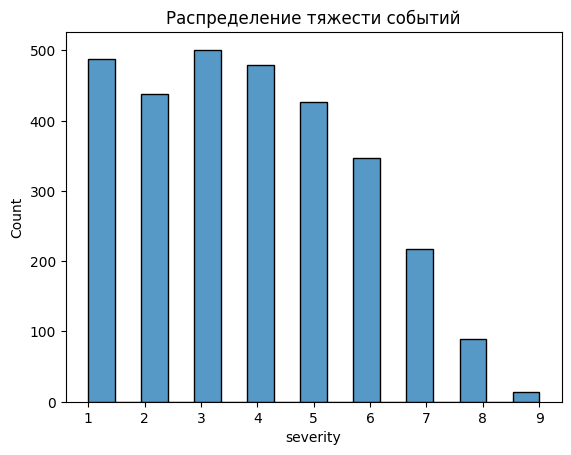

In [14]:
sns.histplot(data=df, x='severity', binwidth=0.48)
plt.title('Распределение тяжести событий')
plt.show()

    year  month   0       date
0   2020      1  46 2020-01-01
1   2020      2  37 2020-02-01
2   2020      3  48 2020-03-01
3   2020      4  40 2020-04-01
4   2020      5  41 2020-05-01
..   ...    ...  ..        ...
64  2025      5  39 2025-05-01
65  2025      6  54 2025-06-01
66  2025      7  56 2025-07-01
67  2025      8  37 2025-08-01
68  2025      9  22 2025-09-01

[69 rows x 4 columns]


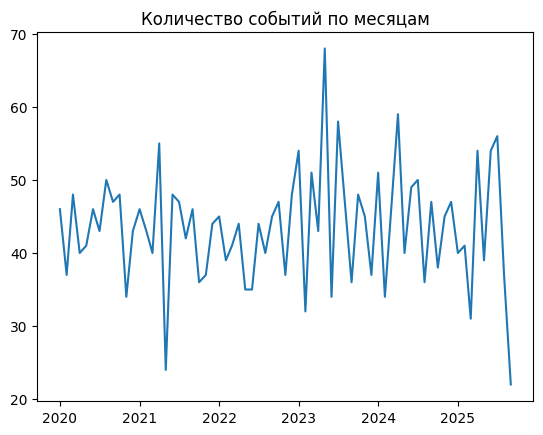

In [15]:
monthly_events = df.groupby(['year', 'month']).size().reset_index()
monthly_events['date'] = pd.to_datetime(monthly_events[['year', 'month']].assign(day=1))
print(monthly_events)
plt.plot(monthly_events['date'], monthly_events[0])
plt.title('Количество событий по месяцам')
plt.show()

Text(0.5, 1.0, 'Корреляционная матрица')

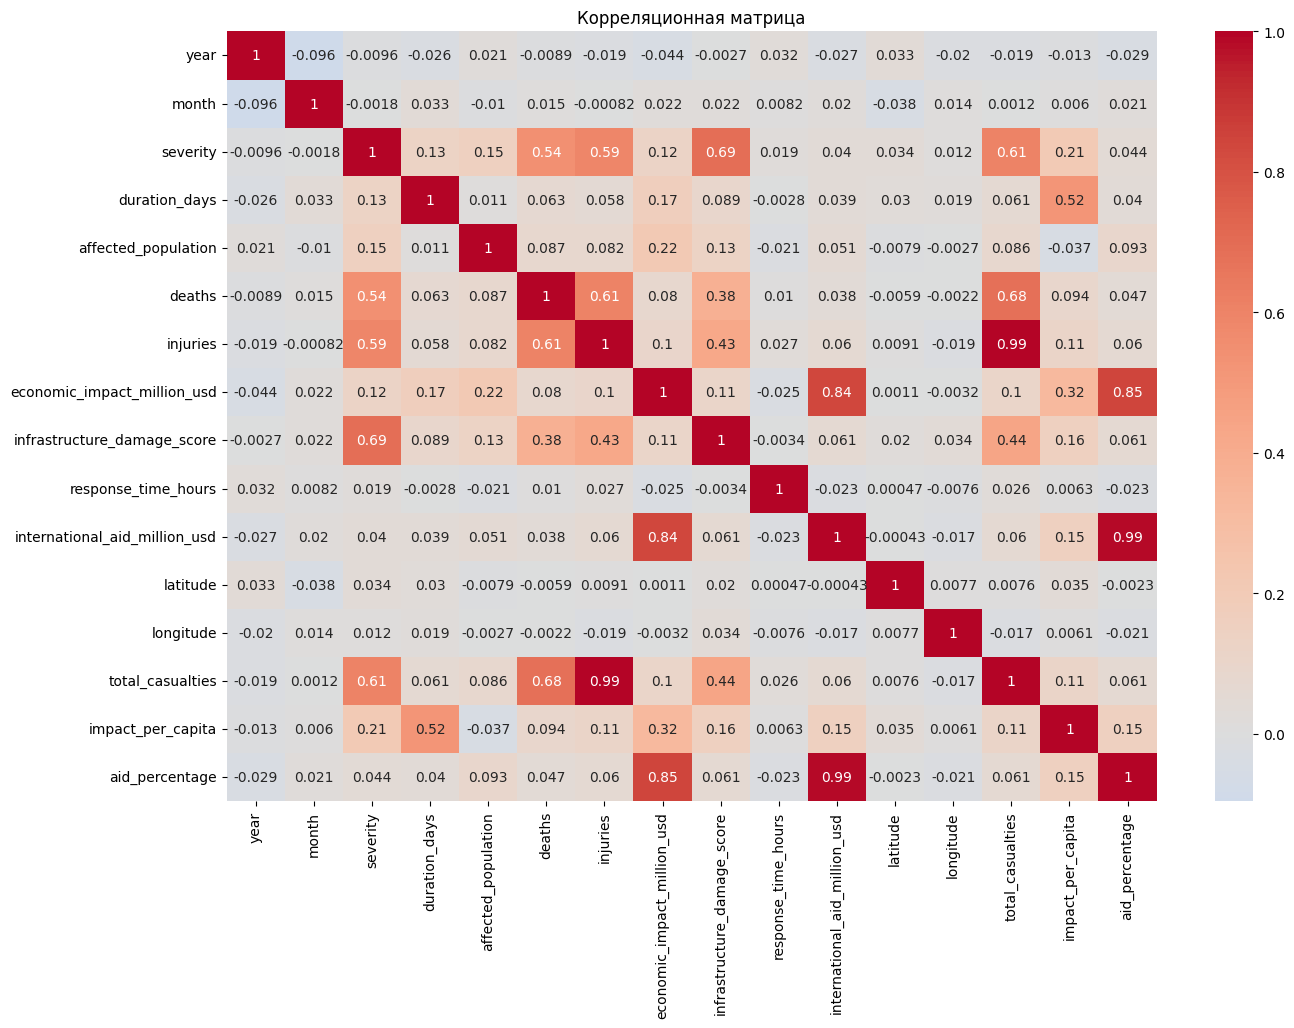

In [16]:
correlation_matrix = df.corr(numeric_only=True)
plt.figure(figsize=(15,10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Корреляционная матрица')

In [17]:
display(df[df['aid_percentage'] > 0])
print(df['aid_percentage'].value_counts())

,event_id,date,year,month,country,event_type,severity,duration_days,affected_population,deaths,injuries,economic_impact_million_usd,infrastructure_damage_score,response_time_hours,international_aid_million_usd,latitude,longitude,total_casualties,impact_per_capita,aid_percentage
402,EV01158,2020-10-03,2020,10,United States,Heatwave,8,40,7573296,26,297,718.21,53.3,1,164.51,-0.0304,-88.8553,323,94.83,22.9
787,EV02726,2021-07-05,2021,7,China,Drought,7,17,42429727,40,69,135.05,21.7,9,6.55,-31.3942,-154.3852,109,3.18,4.9


aid_percentage
0.0     2998
22.9       1
4.9        1
Name: count, dtype: int64


Text(0.5, 1.0, 'Экономический ущерб vs человеческие жертвы')

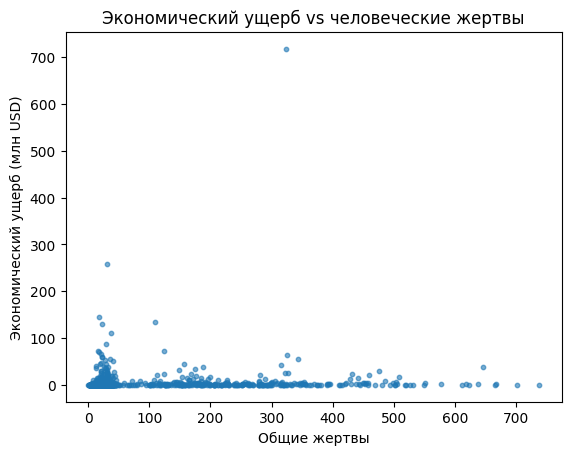

In [18]:
plt.scatter(df['total_casualties'], df['economic_impact_million_usd'], alpha=0.6, s=10)
plt.xlabel('Общие жертвы')
plt.ylabel('Экономический ущерб (млн USD)')
plt.title('Экономический ущерб vs человеческие жертвы')

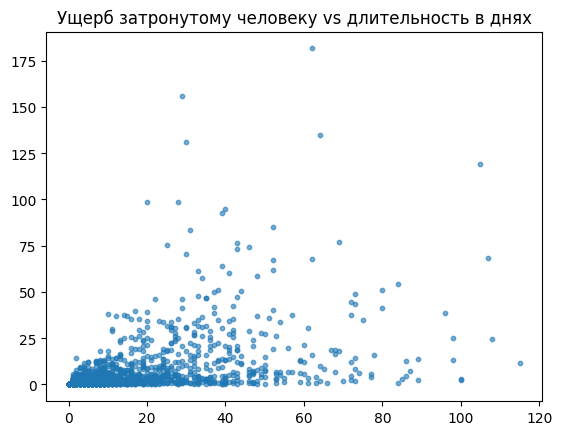

In [19]:
plt.scatter(df['duration_days'], df['impact_per_capita'], alpha=0.6, s=10)
plt.title('Ущерб затронутому человеку vs длительность в днях')
plt.show()

In [20]:
# Проверим распределение severity по типам событий
severity_by_type = [df[df['event_type'] == event_type]['severity'] 
                   for event_type in df['event_type'].unique()]

# Проверка нормальности (тест Шапиро-Уилка)
from scipy.stats import shapiro
print("Проверка нормальности распределения тяжести:")
for i, event_type in enumerate(df['event_type'].unique()):
    stat, p_value = shapiro(severity_by_type[i])
    print(f"{event_type}: p-value = {p_value:.4f} {'(нормальное)' if p_value > 0.05 else '(ненормальное)'}")

# Проверка гомогенности дисперсий (тест Левена)
from scipy.stats import levene
levene_stat, levene_p = levene(*severity_by_type)
print(f"\nТест Левена на гомогенность дисперсий: p-value = {levene_p:.4f}")

f_stat_anova, p_anova = f_oneway(*severity_by_type)
h_stat_kw, p_kw = kruskal(*severity_by_type)

print(f"ANOVA: F = {f_stat_anova:.3f}, p = {p_anova:.4f}")
print(f"Крускал-Уоллис: H = {h_stat_kw:.3f}, p = {p_kw:.4f}")


Проверка нормальности распределения тяжести:
Tsunami: p-value = 0.0000 (ненормальное)
Hurricane: p-value = 0.0000 (ненормальное)
Drought: p-value = 0.0000 (ненормальное)
Heatwave: p-value = 0.0000 (ненормальное)
Wildfire: p-value = 0.0000 (ненормальное)
Cold Wave: p-value = 0.0000 (ненормальное)
Earthquake: p-value = 0.0000 (ненормальное)
Landslide: p-value = 0.0000 (ненормальное)
Hailstorm: p-value = 0.0000 (ненормальное)
Volcanic Eruption: p-value = 0.0000 (ненормальное)
Flood: p-value = 0.0000 (ненормальное)
Tornado: p-value = 0.0000 (ненормальное)

Тест Левена на гомогенность дисперсий: p-value = 0.0000
ANOVA: F = 81.508, p = 0.0000
Крускал-Уоллис: H = 718.513, p = 0.0000


In [21]:
print("Описательная статистика по типам событий:")
severity_stats = df.groupby('event_type')['severity'].agg(['count', 'mean', 'median', 'std']).round(3)
print(severity_stats.sort_values('mean', ascending=False))



Описательная статистика по типам событий:
                   count   mean  median    std
event_type                                    
Heatwave             235  4.617     5.0  2.029
Landslide            275  4.531     5.0  1.835
Cold Wave            238  4.521     4.0  1.839
Drought              262  4.508     4.0  1.869
Wildfire             237  4.477     5.0  1.746
Tornado              237  4.439     4.0  1.867
Flood                221  4.416     4.0  1.972
Hailstorm            248  4.403     5.0  1.885
Hurricane            252  2.575     2.0  1.517
Tsunami              247  2.457     2.0  1.511
Earthquake           287  2.456     2.0  1.500
Volcanic Eruption    261  2.410     2.0  1.543


Коэффициент корреляции Пирсона: 0.119, p-value = 0.0000
Статистически значимая корреляция между тяжестью и экономическим ущербом
------------------------------------------------------------
Коэффициент корреляции Пирсона: 0.440, p-value = 0.0000
Статистически значимая корреляция между жертвами и ущербом инфраструктуре
------------------------------------------------------------
Коэффициент корреляции Пирсона: 0.103, p-value = 0.0000
Статистически значимая корреляция между жертвами и экономическим ущербом
------------------------------------------------------------
Коэффициент корреляции Пирсона: 0.688, p-value = 0.0000
Статистически значимая корреляция между тяжестью и ущербом инфраструктурам
------------------------------------------------------------
Коэффициент корреляции Спирмена: 0.567, p-value = 0.0000
Статистически значимая корреляция между тяжестью и экономическим ущербом
------------------------------------------------------------
Коэффициент корреляции Спирмена: 0.658, p-valu

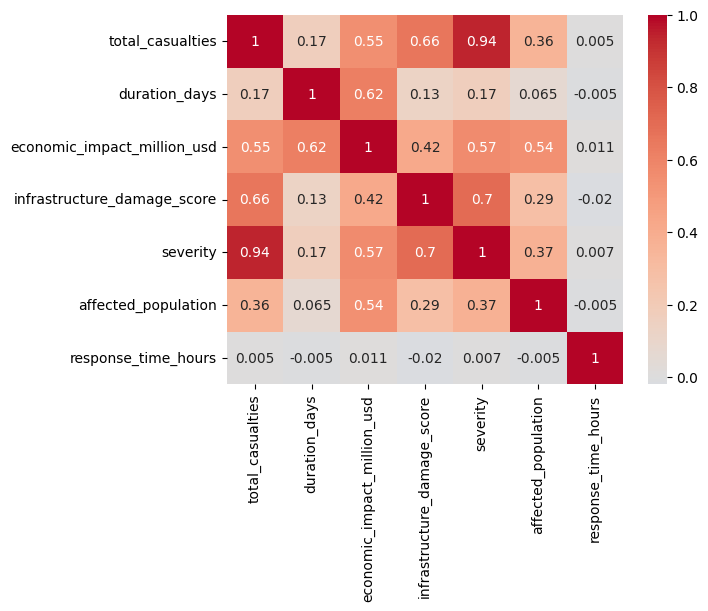


Корреляции с общим количеством жертв:
  severity: 0.938 ***
  infrastructure_damage_score: 0.658 ***
  economic_impact_million_usd: 0.547 ***
  affected_population: 0.357 ***
  duration_days: 0.168 ***
  response_time_hours: 0.005 


In [22]:
corr_coef, p_value = pearsonr(df['severity'], df['economic_impact_million_usd'], )
print(f"Коэффициент корреляции Пирсона: {corr_coef:.3f}, p-value = {p_value:.4f}")
if p_value < 0.05:
    print("Статистически значимая корреляция между тяжестью и экономическим ущербом")
print('-'*60)

corr_coef, p_value = pearsonr(df['total_casualties'], df['infrastructure_damage_score'], )
print(f"Коэффициент корреляции Пирсона: {corr_coef:.3f}, p-value = {p_value:.4f}")
if p_value < 0.05:
    print("Статистически значимая корреляция между жертвами и ущербом инфраструктуре")
print('-'*60)

corr_coef, p_value = pearsonr(df['total_casualties'], df['economic_impact_million_usd'])
print(f"Коэффициент корреляции Пирсона: {corr_coef:.3f}, p-value = {p_value:.4f}")
if p_value < 0.05:
    print("Статистически значимая корреляция между жертвами и экономическим ущербом")
print('-'*60)

corr_coef, p_value = pearsonr(df['severity'], df['infrastructure_damage_score'], )
print(f"Коэффициент корреляции Пирсона: {corr_coef:.3f}, p-value = {p_value:.4f}")
if p_value < 0.05:
    print("Статистически значимая корреляция между тяжестью и ущербом инфраструктурам")
print('-'*60)

corr_coef, p_value = spearmanr(df['severity'], df['economic_impact_million_usd'], )
print(f"Коэффициент корреляции Спирмена: {corr_coef:.3f}, p-value = {p_value:.4f}")
if p_value < 0.05:
    print("Статистически значимая корреляция между тяжестью и экономическим ущербом")
print('-'*60)

corr_coef, p_value = spearmanr(df['total_casualties'], df['infrastructure_damage_score'], )
print(f"Коэффициент корреляции Спирмена: {corr_coef:.3f}, p-value = {p_value:.4f}")
if p_value < 0.05:
    print("Статистически значимая корреляция между жертвами и ущербом инфраструктуре")
print('-'*60)

corr_coef, p_value = spearmanr(df['total_casualties'], df['economic_impact_million_usd'])
print(f"Коэффициент корреляции Спирмена: {corr_coef:.3f}, p-value = {p_value:.4f}")
if p_value < 0.05:
    print("Статистически значимая корреляция между жертвами и экономическим ущербом")
print('-'*60)

corr_coef, p_value = spearmanr(df['severity'], df['infrastructure_damage_score'], )
print(f"Коэффициент корреляции Спирмена: {corr_coef:.3f}, p-value = {p_value:.4f}")
if p_value < 0.05:
    print("Статистически значимая корреляция между тяжестью и ущербом инфраструктурам")


variables = ['total_casualties', 'duration_days', 'economic_impact_million_usd', 
            'infrastructure_damage_score', 'severity', 'affected_population',
            'response_time_hours']

correlation_matrix = df[variables].corr(method='spearman')

print("Матрица корреляций Спирмена:")
sns.heatmap(correlation_matrix.round(3), annot=True, cmap='coolwarm', center=0)
plt.show()
# Анализ корреляций с жертвами
print("\nКорреляции с общим количеством жертв:")
casualty_correlations = correlation_matrix['total_casualties'].sort_values(ascending=False)
for var, corr in casualty_correlations.items():
    if var != 'total_casualties':
        p_val = spearmanr(df['total_casualties'], df[var].fillna(0))[1]
        sig = "***" if p_val < 0.001 else "**" if p_val < 0.01 else "*" if p_val < 0.05 else ""
        print(f"  {var}: {corr:.3f} {sig}")


In [23]:
top_countries = df['country'].value_counts().head(10).index
print(top_countries, )

country_groups = []
for country in top_countries:
    country_data = df[df['country'] == country]['economic_impact_million_usd']
    country_groups.append(country_data)
    print(f"{country}: средний ущерб = {country_data.mean():.2f} млн USD")

if len(country_groups) >= 2:
    f_stat, p_value = f_oneway(*country_groups)
    print(f"\nANOVA тест для топ-5 стран: F-статистика = {f_stat:.3f}, p-value = {p_value:.4f}")


Index(['Japan', 'Portugal', 'Czech Republic', 'Egypt', 'Denmark', 'Singapore',
       'France', 'Hungary', 'Kazakhstan', 'New Zealand'],
      dtype='object', name='country')
Japan: средний ущерб = 5.47 млн USD
Portugal: средний ущерб = 0.26 млн USD
Czech Republic: средний ущерб = 0.65 млн USD
Egypt: средний ущерб = 0.35 млн USD
Denmark: средний ущерб = 0.51 млн USD
Singapore: средний ущерб = 0.44 млн USD
France: средний ущерб = 4.29 млн USD
Hungary: средний ущерб = 0.26 млн USD
Kazakhstan: средний ущерб = 0.35 млн USD
New Zealand: средний ущерб = 0.20 млн USD

ANOVA тест для топ-5 стран: F-статистика = 6.482, p-value = 0.0000


In [24]:
analysis_df = df[df['country'].isin(top_countries)].copy()
normality_results = []
economic_groups = []

for country in top_countries:
    country_data = analysis_df[analysis_df['country'] == country]['economic_impact_million_usd'].dropna()
    if len(country_data) >= 3:  # Минимальный размер для теста Шапиро
        stat, p_value = shapiro(country_data)
        normality_results.append((country, p_value, len(country_data)))
        economic_groups.append(country_data)
        normal_status = 'нормальное' if p_value > 0.05 else 'НЕнормальное'
        print(f"  {country}: p-value = {p_value:.4f} ({normal_status}), n = {len(country_data)}")

# Проверка гомогенности дисперсий (тест Левена)
try:
    levene_stat, levene_p = levene(*economic_groups)
    print(f"\nТест Левена на гомогенность дисперсий: p-value = {levene_p:.6f}")
    print(f"Дисперсии: {'однородны' if levene_p > 0.05 else 'НЕоднородны'}")
except Exception as e:
    print(f"\nТест Левена не может быть выполнен: {e}")

# 4. ТЕСТ КРУСКАЛА-УОЛЛИСА
print("\n\nТЕСТ КРУСКАЛА-УОЛЛИСА ДЛЯ ГИПОТЕЗЫ 5")
print("-" * 50)

# Выполняем тест Крускала-Уоллиса
h_stat, p_value = kruskal(*economic_groups)

print(f"H-статистика = {h_stat:.4f}")
print(f"p-value = {p_value:.6f}")

if p_value < 0.001:
    significance = "*** (p < 0.001)"
elif p_value < 0.01:
    significance = "** (p < 0.01)"
elif p_value < 0.05:
    significance = "* (p < 0.05)"
else:
    significance = "не значимо"

print(f"Результат: {significance}")

  Japan: p-value = 0.0000 (НЕнормальное), n = 86
  Portugal: p-value = 0.0000 (НЕнормальное), n = 75
  Czech Republic: p-value = 0.0000 (НЕнормальное), n = 70
  Egypt: p-value = 0.0000 (НЕнормальное), n = 70
  Denmark: p-value = 0.0000 (НЕнормальное), n = 69
  Singapore: p-value = 0.0000 (НЕнормальное), n = 68
  France: p-value = 0.0000 (НЕнормальное), n = 68
  Hungary: p-value = 0.0000 (НЕнормальное), n = 67
  Kazakhstan: p-value = 0.0000 (НЕнормальное), n = 67
  New Zealand: p-value = 0.0000 (НЕнормальное), n = 66

Тест Левена на гомогенность дисперсий: p-value = 0.000000
Дисперсии: НЕоднородны


ТЕСТ КРУСКАЛА-УОЛЛИСА ДЛЯ ГИПОТЕЗЫ 5
--------------------------------------------------
H-статистика = 121.6192
p-value = 0.000000
Результат: *** (p < 0.001)


In [25]:
corr_coef, p_value = pearsonr(df['response_time_hours'], df['total_casualties'])
print(f"Коэффициент корреляции Пирсона: {corr_coef:.3f}, p-value = {p_value:.4f}")
if p_value < 0.05:
    print("Статистически значимая корреляция между временем реагирования и жертвами")
else:
    print("Нет статистически значимой корреляции между временем реагирования и жертвами")

corr_coef, p_value = spearmanr(df['response_time_hours'], df['total_casualties'])
print(f"Коэффициент корреляции Пирсона: {corr_coef:.3f}, p-value = {p_value:.4f}")
if p_value < 0.05:
    print("Статистически значимая корреляция между временем реагирования и жертвами")
else:
    print("Нет статистически значимой корреляции между временем реагирования и жертвами")


Коэффициент корреляции Пирсона: 0.026, p-value = 0.1541
Нет статистически значимой корреляции между временем реагирования и жертвами
Коэффициент корреляции Пирсона: 0.005, p-value = 0.7669
Нет статистически значимой корреляции между временем реагирования и жертвами


In [26]:
top_damaging = df.nlargest(10, 'economic_impact_million_usd')[['country', 'event_type', 'economic_impact_million_usd', 'total_casualties']]
print("\nТоп-10 событий по экономическому ущербу:")
display(top_damaging)


Топ-10 событий по экономическому ущербу:


,country,event_type,economic_impact_million_usd,total_casualties
402,United States,Heatwave,718.21,323
262,United States,Heatwave,257.83,30
183,China,Drought,144.93,17
787,China,Drought,135.05,109
234,Japan,Cold Wave,130.68,23
679,China,Cold Wave,110.34,37
2702,China,Drought,86.62,29
685,United States,Heatwave,72.56,124
753,United States,Hurricane,72.08,16
974,United States,Cold Wave,70.66,17


In [27]:
df['season'] = df['month'].apply(lambda x: 'Winter' if x in [12, 1, 2] else 
                               'Spring' if x in [3, 4, 5] else 
                               'Summer' if x in [6, 7, 8] else 'Autumn')

seasonal_analysis = df.groupby('season').agg({
    'economic_impact_million_usd': 'sum',
    'total_casualties': 'sum',
    'event_id': 'count', 
    'duration_days': 'mean',
    'affected_population': 'sum'
}).rename(columns={'event_id': 'event_count',
                   'duration_days': 'duration_days_mean'
                   })

print("\nАнализ по сезонам:")
display(seasonal_analysis)


Анализ по сезонам:


,economic_impact_million_usd,total_casualties,event_count,duration_days_mean,affected_population
season,,,,,
Autumn,1807.76,28946,658,9.577508,574827689
Spring,1195.64,33470,799,7.739675,597864521
Summer,1758.79,39823,816,9.117647,619752720
Winter,1070.91,29291,727,8.834938,813206556


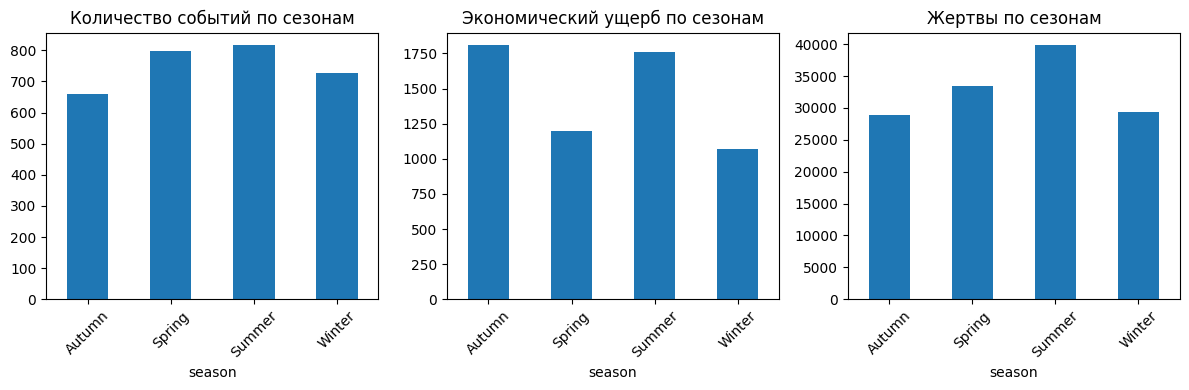

In [28]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
seasonal_analysis['event_count'].plot(kind='bar')
plt.title('Количество событий по сезонам')
plt.xticks(rotation=45)

plt.subplot(1, 3, 2)
seasonal_analysis['economic_impact_million_usd'].plot(kind='bar')
plt.title('Экономический ущерб по сезонам')
plt.xticks(rotation=45)

plt.subplot(1, 3, 3)
seasonal_analysis['total_casualties'].plot(kind='bar')
plt.title('Жертвы по сезонам')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

In [29]:
# Создание климатических зон по широте
def get_climate_zone(latitude):
    if abs(latitude) <= 23.5:
        return 'Тропическая'
    elif abs(latitude) <= 35:
        return 'Субтропическая'
    elif abs(latitude) <= 55:
        return 'Умеренная'
    elif abs(latitude) <= 66.5:
        return 'Субполярная'
    else:
        return 'Полярная'

df['climate_zone'] = df['latitude'].apply(get_climate_zone)
df['hemisphere'] = df['latitude'].apply(lambda x: 'Северное' if x >= 0 else 'Южное')

In [30]:
# Анализ распределения событий по климатическим зонам
print("\nРаспределение событий по климатическим зонам:")
climate_zone_stats = df.groupby('climate_zone').agg({
    'event_id': 'count',
    'economic_impact_million_usd': ['mean', 'sum'],
    'total_casualties': ['mean', 'sum'],
    'severity': 'mean'
}).round(2)

display(climate_zone_stats)


Распределение событий по климатическим зонам:


event_id economic_impact_million_usd          total_casualties  \
                  count                        mean      sum             mean   
climate_zone                                                                    
Полярная            778                        1.66  1294.11            43.73   
Субполярная         409                        1.03   420.77            42.34   
Субтропическая      363                        2.08   754.65            46.33   
Тропическая         795                        2.67  2125.89            45.21   
Умеренная           655                        1.89  1237.68            41.89   

                      severity  
                  sum     mean  
climate_zone                    
Полярная        34020     3.80  
Субполярная     17317     3.64  
Субтропическая  16817     3.78  
Тропическая     35941     3.93  
Умеренная       27435     3.69

In [31]:
# Анализ по полушариям
print("\nСравнение полушарий:")
hemisphere_stats = df.groupby('hemisphere').agg({
    'event_id': 'count',
    'economic_impact_million_usd': ['mean', 'sum'],
    'total_casualties': ['mean', 'sum'],
    'severity': 'mean'
}).round(2)
display(hemisphere_stats)


Сравнение полушарий:


event_id economic_impact_million_usd         total_casualties  \
              count                        mean     sum             mean   
hemisphere                                                                 
Северное       1478                        1.65  2441.3            44.58   
Южное          1522                        2.23  3391.8            43.13   

                  severity  
              sum     mean  
hemisphere                  
Северное    65887     3.84  
Южное       65643     3.74

Средние значения по типам событий:


total_casualties                    duration_days  \
                              mean median  max    sum          mean   
event_type                                                            
Heatwave                     69.03   24.0  702  16221         28.29   
Flood                        61.64   23.0  527  13622          5.63   
Tornado                      58.45   24.0  549  13852          1.61   
Cold Wave                    58.23   25.0  623  13858         28.40   
Wildfire                     57.65   24.0  738  13663          5.12   
Drought                      56.68   25.0  618  14850         25.87   
Hailstorm                    55.77   24.0  666  13832          1.59   
Landslide                    55.67   25.0  667  15309          1.56   
Volcanic Eruption            16.66   12.0  316   4347          1.56   
Tsunami                      15.72   11.0  296   3882          1.63   
Earthquake                   15.24   11.0  347   4373          1.61   
Hurricane                    14.77   12.0  107   3721          4.87   

                  economic_impact_million_usd infrastructure_damage_score  \
                                         mean                        mean   
event_type                                                                  
Heatwave                                 9.18                       18.62   
Flood                                    1.40                       16.60   
Tornado                                  0.53                       17.33   
Cold Wave                                5.09                       18.64   
Wildfire                                 1.04                       18.01   
Drought                                  5.10                       18.12   
Hailstorm                                0.32                       17.46   
Landslide                                0.34                       18.74   
Volcanic Eruption                        0.10                        9.81   
Tsunami                                  0.11                       10.10   
Earthquake                               0.10                        9.50   
Hurricane                                0.76                       10.38   

                  severity  
                      mean  
event_type                  
Heatwave              4.62  
Flood                 4.42  
Tornado               4.44  
Cold Wave             4.52  
Wildfire              4.48  
Drought               4.51  
Hailstorm             4.40  
Landslide             4.53  
Volcanic Eruption     2.41  
Tsunami               2.46  
Earthquake            2.46  
Hurricane             2.58


Тест Крускала-Уоллиса для различий в жертвах между типами событий:
H-статистика: 631.544, p-value: 0.0000


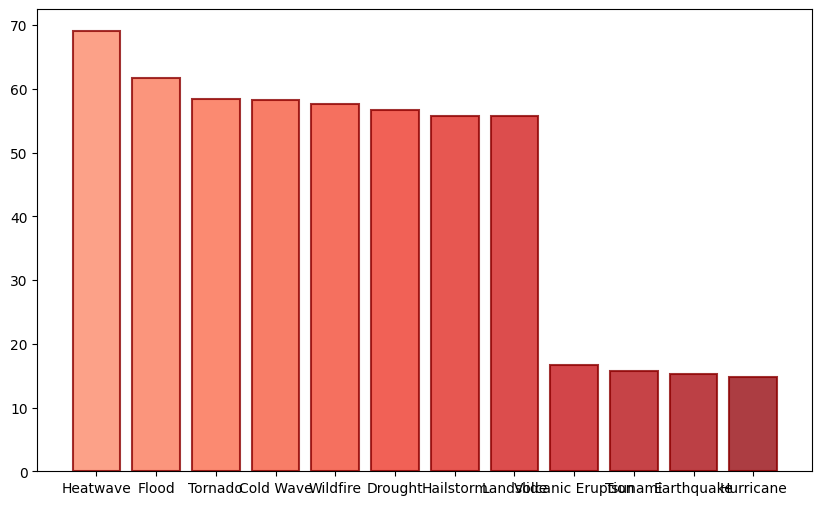

In [35]:
print("Средние значения по типам событий:")
casualty_analysis = df.groupby('event_type').agg({
    'total_casualties': ['mean', 'median', 'max', 'sum'],
    'duration_days': 'mean',
    'economic_impact_million_usd': 'mean',
    'infrastructure_damage_score': 'mean',
    'severity': 'mean'
}).round(2)

display(casualty_analysis.sort_values(('total_casualties', 'mean'), ascending=False))

# Статистические тесты различий между типами событий
event_types = df['event_type'].unique()
casualty_by_type = [df[df['event_type'] == event]['total_casualties'] for event in event_types]

# Тест Крускала-Уоллиса для ненормальных данных
h_stat, p_value = kruskal(*casualty_by_type)
print(f"\nТест Крускала-Уоллиса для различий в жертвах между типами событий:")
print(f"H-статистика: {h_stat:.3f}, p-value: {p_value:.4f}")

casualty_stats = df.groupby('event_type')['total_casualties'].agg([
    'count', 
    'mean', 
    'median', 
    'std',
    'sum'
]).round(2).sort_values('mean', ascending=False)

plt.figure(figsize=(10, 6))

# Создаем цветовую палитру - красные оттенки для большей наглядности
colors = plt.cm.Reds(np.linspace(0.4, 0.9, len(casualty_stats)))

# Основная гистограмма
bars = plt.bar(casualty_stats.index, casualty_stats['mean'], 
               color=colors, alpha=0.8, edgecolor='darkred', linewidth=1.5)


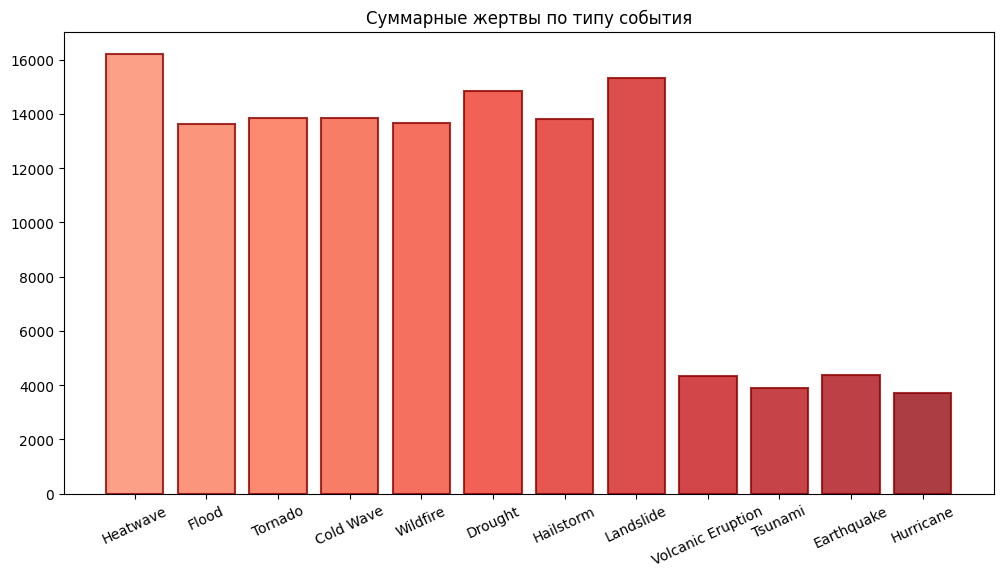

In [36]:
plt.figure(figsize=(12, 6))
bars = plt.bar(casualty_stats.index, casualty_stats['sum'], 
               color=colors, alpha=0.8, edgecolor='darkred', linewidth=1.5)
plt.title("Суммарные жертвы по типу события")
plt.xticks(rotation=25)
plt.show()
